In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from pandas import Series,DataFrame

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn import linear_model

In [2]:
iris = load_iris()
x = iris.data
y = iris.target

In [4]:
iris_data = DataFrame(x,columns=['slen','swidth','plen','pwidth'])
iris_target = DataFrame(y,columns=['Spe'])

In [5]:
def flower(num):
    if num == 0:
        return 'setosa'
    elif num == 1:
        return 'vers'
    else: 
        return 'vig'
    
    

In [7]:
iris_target['Spe'] = iris_target['Spe'].apply(flower)


In [10]:
iris = pd.concat([iris_data,iris_target],axis =1)
iris.head()

,slen,swidth,plen,pwidth,Spe
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


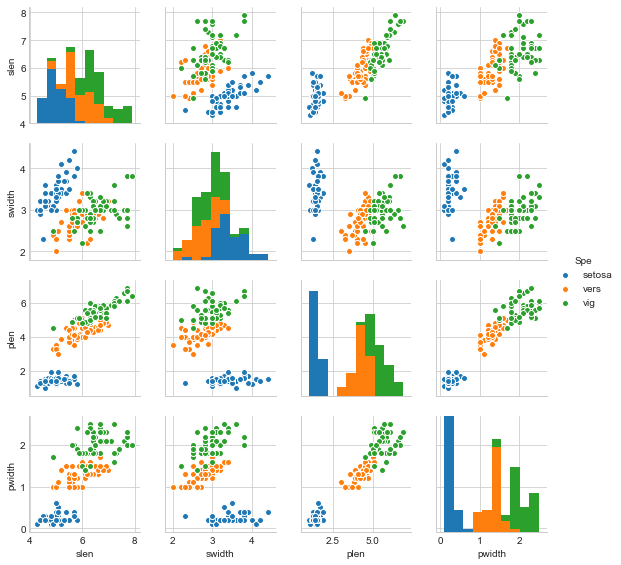

In [13]:
sns.pairplot(iris, hue= 'Spe',size=2)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [17]:
logreg = LogisticRegression()
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.4,random_state = 3)

In [18]:
logreg.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
ypred = logreg.predict(xtest)
print (metrics.accuracy_score(ytest,ypred))

0.933333333333


In [23]:
from sklearn.neighbors import KNeighborsClassifier


In [25]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [27]:
ypred2 = knn.predict(xtest)
print (metrics.accuracy_score(ytest,ypred2))

0.95


In [31]:
krange = range(1,21)
accuracy = []


In [34]:
for k in krange:
    knn =KNeighborsClassifier(n_neighbors= k)
    knn.fit(xtrain,ytrain)
    ypred2 = knn.predict(xtest)
    accuracy.append(metrics.accuracy_score(ytest,ypred2))

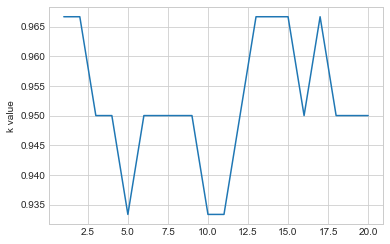

In [36]:
plt.plot(krange,accuracy)
plt.ylabel('k value')